# APIs

## Application Programming Interface

<div class="alert alert-success">
An API is a programmatic interface to an application - a software to software interface, or way for programs to talk to other programs. 
</div>

## Module APIs

Modules have an API. Every time you write or use a set of functions and/or classes, you are writing or using an API. 

### Clicker Question #1

What will the following code snippet print out:

In [1]:
def foo(a, b, c=0):
    d = c
    for e in a[:b]:
        d += e
    return d

print(foo(b=2, a=[10, 10, 10, 10]))

20


A) 10 | B) 20 | C) 30 | D) 40 | E) None

### Function with Fixed Names

In [ ]:
def sum_across_list(list_to_count, end_index, start_val=0):

    running_count = start_val
    
    for element in list_to_count[:end_index]:
        running_count += element
    
    return running_count

print(sum_across_list(end_index=2, list_to_count=[10, 10, 10, 10]))

## Names Matter!

When writing an API, you are designing the user facing code that a programmer (maybe you in the future) will use.

When using an API, you are using the programmer-facing code that someone else wrote for the task. 

Taking time to have good names and clear documentation can *really help* a programmer interact with an API. 

## Web APIs

APIs are an interface to interact with an application, designed for programmatic use
- They allow systematic, controlled access to (for example) an applications database and procedures
- They can be used to request data and/or to request that the the application perform some procedure

## EUtils API

<div class="alert alert-success">
EUtils is a web accessible API for the National Center for Biotechnology Information, and the databases they curate.
</div>

### EUtils: Search

In [2]:
# Set the base URL for the e-utils API
base_url = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/'

In [3]:
# Set the information we need for launching a search request
search = 'esearch.fcgi?'
term = 'term=' + 'brain'

### EUtils: Fetch

In [5]:
# Build the full search URL
search_url = base_url + search + term
print(search_url)

http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?term=brain


In [7]:
# Set the information we need for launching a fetch request
fetch = 'efetch.fcgi?'
db = 'db=' + 'pubmed'
retmode = '&retmode=' + 'xml'
pubmed_id = '&id=' + str(30439964)

In [8]:
# Build the full search URL
fetch_url = base_url + fetch + db + retmode + pubmed_id
print(fetch_url)

http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id=30439964


## Requesting Web Pages from Python

In [9]:
# The requests module allows you to send URL requests from python
import requests

# Beautiful Soup has functions to 'clean up' returned web pages into human-friendlier formats
from bs4 import BeautifulSoup

### EUtils Search, through Python

In [11]:
# Request the search page, and parse
search_page = requests.get(search_url)
search_content = BeautifulSoup(search_page.content, 'xml')

In [ ]:
# Check out the content of the returned page
search_content

### EUtils Fetch, through Python

In [13]:
# Request the fetch page, and parse
fetch_page = requests.get(fetch_url)
fetch_content = BeautifulSoup(fetch_page.content, 'lxml')

In [18]:
# Check out the content of the page
fetch_content

### BeautifulSoup Objects

In [15]:
# Our 'fetch_content' variable is a custom BeautifulSoup object
type(fetch_content)

bs4.BeautifulSoup

In [17]:
# We can use some methods to access particular information
fetch_content.find('year').text

'2018'

## Literature Scanner

In [19]:
# Import LISC - Words
from lisc.words import Words

In [20]:
# Initialize Words object & set some search terms
words = Words()
words.set_terms(['brain']) 

In [21]:
# Run words scrape
words.run_scrape(retmax='5')

### LISC: Words Data

In [22]:
# Check out some information from our scraped data
for art in words['brain']:
    print(art['title'])

[Study of de novo point mutations in known genes among patients with unexplained intellectual disability or developmental delay].
Progressively Disrupted Somatodendritic Morphology in Dopamine Neurons in a Mouse Parkinson's Model.
BDNF provides many routes toward STN DBS-mediated disease modification.
The value of magnetic resonance spectroscopy as a supplement to MRI of the brain in a clinical setting.
Solid peripheral tumor leads to systemic inflammation, astrocyte activation and signs of behavioral despair in mice.


In [23]:
%matplotlib inline
from lisc.plts.wc import make_wc
from lisc.data_all import DataAll

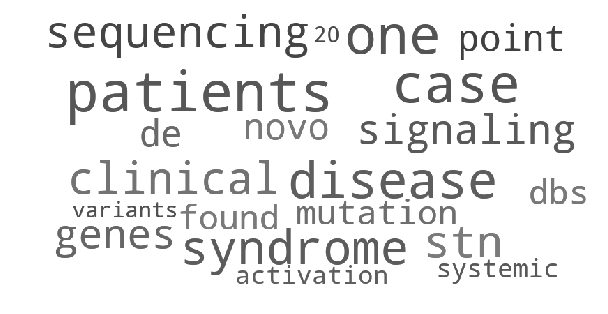

In [24]:
# Get the data from the 'brain' word search, and make a wordcloud
brain_dat = DataAll(words.results[0])
make_wc(brain_dat.word_freqs, 20, 'Brain')

## Twitter API

In [ ]:
# Accessing Twitter API from Python
#  Note: to run this, you will have to fill in stw.py with your OAuth credentials.
#    You can do that here: https://apps.twitter.com/

# Import tweepy to access API
import tweepy
from tweepy import OAuthHandler

# Import my API credentials
from stw import *

# Twitter API requires Authentification with OAuth
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# # Create an API object to access Twitter
api = tweepy.API(auth)

for status in tweepy.Cursor(api.home_timeline).items(3):
    # Process a single status
    print(status.user.name)
    print(status.text, '\n')